### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [77]:
data = pd.read_csv('data/coupons.csv')

In [78]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

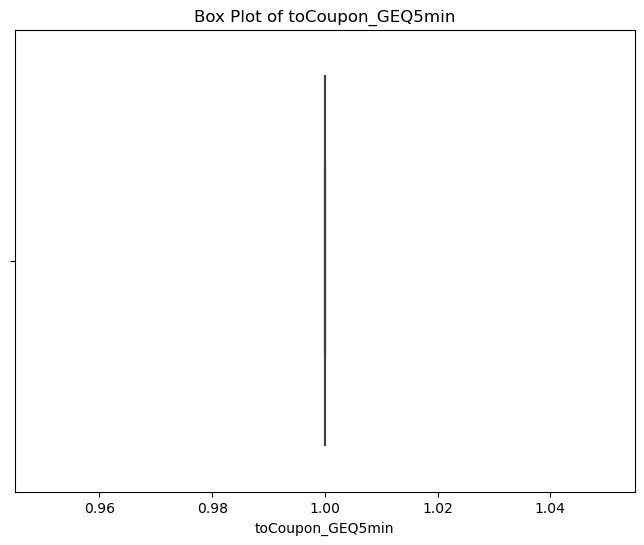

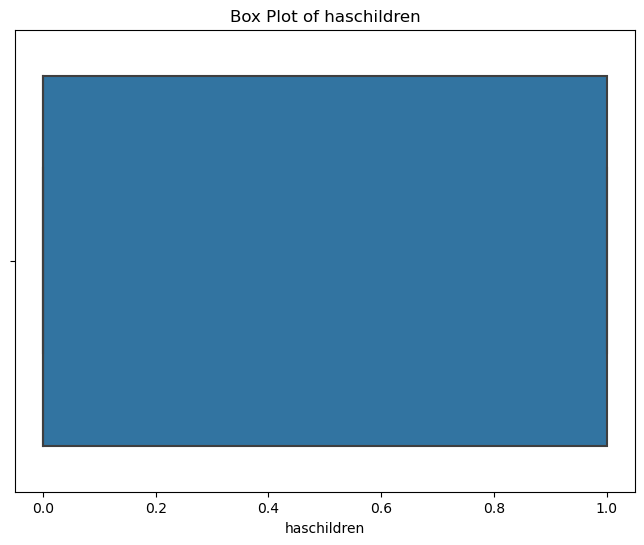

In [79]:
# Get an overview of the dataset

data.info()

# Find any duplicate rows based upon all columns
duplicate_rows = data[data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns:")


# Get the count of duplicate rows
num_duplicates = len(duplicate_rows)
print("Number of duplicate rows:", num_duplicates)


# Find missing data
missing_data = data.isnull()

# Count missing values in each column
missing_count_per_column = missing_data.sum()

# Count total missing values in the DataFrame
total_missing_count = missing_count_per_column.sum()

print("Missing data per column:")
print(missing_count_per_column)
print("\nTotal missing values in the DataFrame:", total_missing_count)

# Create a box plot for the column 'toCoupon_GEQ5min'
# to find out any anamolies

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['toCoupon_GEQ5min'])
plt.title('Box Plot of toCoupon_GEQ5min')
plt.xlabel('toCoupon_GEQ5min')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['has_children'])
plt.title('Box Plot of haschildren')
plt.xlabel('haschildren')
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [80]:
# Drop Car data column (once executed commented the code)
#data.drop(columns=['car'], inplace=True)

# Group by other relevant features and impute missing 'Bar' values with mode within each group
data['Bar'] = data.groupby(['education', 'occupation'])['Bar'].transform(lambda x: x.fillna(x.mode()[0]))
data['RestaurantLessThan20'] = data.groupby(['Bar'])['RestaurantLessThan20'].transform(lambda x: x.fillna(x.mode()[0]))



4. What proportion of the total observations chose to accept the coupon? 



In [81]:
# Count the number of observations where the coupon was accepted (Y = 1)
num_accepted = data['Y'].sum()

# Calculate the total number of observations
total_observations = len(data)

# Calculate the proportion of total observations that chose to accept the coupon
proportion_accepted = num_accepted / total_observations

print("Proportion of total observations that chose to accept the coupon:", proportion_accepted)

Proportion of total observations that chose to accept the coupon: 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

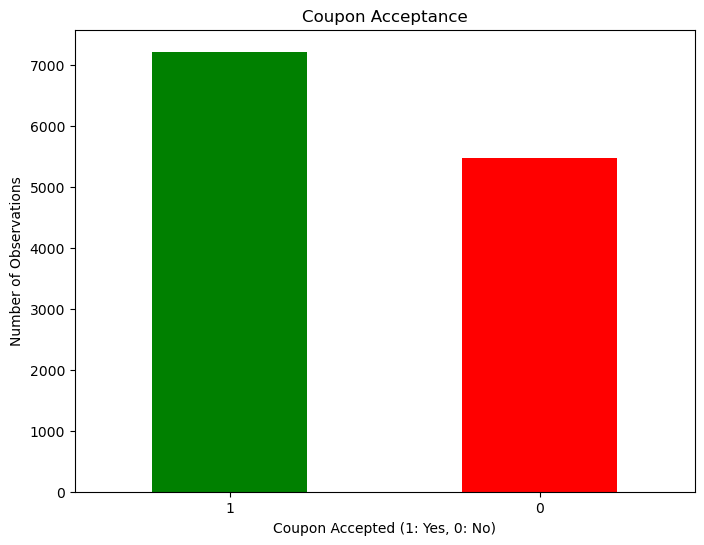

In [82]:
# Count the number of observations where the coupon was accepted (Y = 1)
coupon_accepted_counts = data['Y'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
coupon_accepted_counts.plot(kind='bar', color=['green', 'red'])  # Green for accepted, red for not accepted
plt.title('Coupon Acceptance')
plt.xlabel('Coupon Accepted (1: Yes, 0: No)')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

6. Use a histogram to visualize the temperature column.

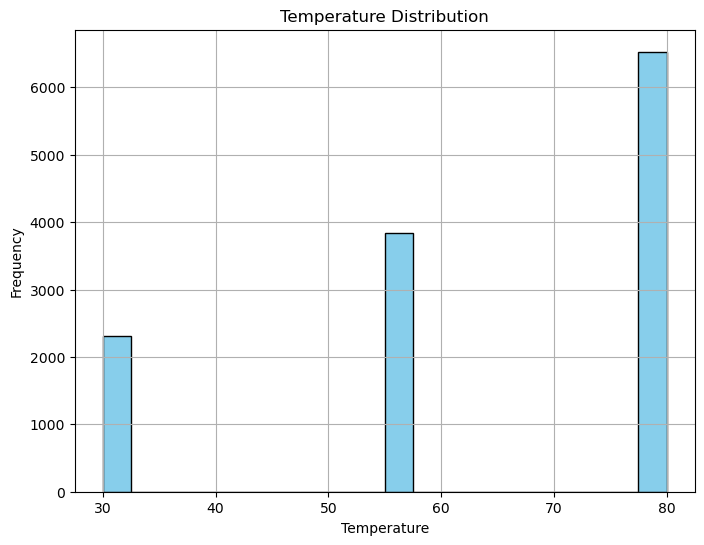

In [83]:
# Create a histogram of the 'temperature' column
plt.figure(figsize=(8, 6))
plt.hist(data['temperature'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)  # Add grid lines for better readability
plt.show()

In [84]:
data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [85]:
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [86]:
data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [87]:
data['occupation'].unique()
data['has_children'].unique()
data['maritalStatus'].unique()
data['income'].unique()
#data['coupon'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [88]:
# Create a new DataFrame containing only the rows where the coupon type is "bar"
bar_coupons_data = data[data['coupon'] == 'Bar'].copy()


2. What proportion of bar coupons were accepted?


In [89]:
# Count the number of bar coupons that were accepted (Y = 1)
accepted_bar_coupons = bar_coupons_data[bar_coupons_data['Y'] == 1]
num_accepted_bar_coupons = len(accepted_bar_coupons)

# Calculate the total number of bar coupons
total_bar_coupons = len(bar_coupons_data)

# Calculate the proportion of bar coupons that were accepted
proportion_accepted_bar_coupons = num_accepted_bar_coupons / total_bar_coupons

print("Proportion of bar coupons that were accepted:", proportion_accepted_bar_coupons)
accepted_bar_coupons['Bar'].unique()

Proportion of bar coupons that were accepted: 0.41001487357461575


array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [90]:
# Filter the DataFrame to include only the rows with values '0', 'less than 1', or '1 to 3' in the 'Bar' column
fewer_than_3_to_bar = accepted_bar_coupons[accepted_bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
more_than_3_to_bar = accepted_bar_coupons[accepted_bar_coupons['Bar'].isin(['gt8', '4~8'])]
accept_ratio_LE3_to_more = len(fewer_than_3_to_bar) / len(more_than_3_to_bar)

accept_ratio_LE3_to_more


4.405228758169935

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [91]:
# Bar Coupon acceptes and over 25
accepted_bar_coupons_lt25 = accepted_bar_coupons[(accepted_bar_coupons['Bar'].isin(['1~3', 'gt8', '4~8'])) & (accepted_bar_coupons['age'].isin(['21', 'below21']))]
len(accepted_bar_coupons_lt25)
ratio_of_25 = len(accepted_bar_coupons_lt25) /len(accepted_bar_coupons)
ratio_of_25


0.14268440145102781

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [92]:
#No Kid and not in farming, fishing and forestry
accepted_bar_coupons_occ = accepted_bar_coupons[(accepted_bar_coupons['Bar'].isin(['1~3', 'gt8', '4~8'])) & 
                                             (accepted_bar_coupons['has_children'] == 0) & 
                                             (~accepted_bar_coupons['occupation'].isin(['farming', 'fishing', 'forestry']))]
len(accepted_bar_coupons_occ)

ratio_of_occ = len(accepted_bar_coupons_occ) /len(accepted_bar_coupons)
ratio_of_occ

0.35308343409915355

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [93]:
#Go to bar more than once...No children...and not widowed
#go to bars and under the age of 30
#go to cheap restaurants and income is less than 50k

accepted_bar_coupons_mar = accepted_bar_coupons[((accepted_bar_coupons['Bar'].isin(['1~3', 'gt8', '4~8'])) & 
                                             (accepted_bar_coupons['has_children'] == 0) & 
                                             (~accepted_bar_coupons['maritalStatus'].isin(['Widowed']))) |
                                            
                                            ((accepted_bar_coupons['Bar'].isin(['1~3', 'gt8', '4~8'])) & 
                                             (accepted_bar_coupons['age'].isin(['21', '26', 'below21']))) |
                                            
                                            ((accepted_bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
                                             (accepted_bar_coupons['income'].isin(['$37500 - $49999', '$12500 - $24999',
                                                                             '$25000 - $37499', 'Less than $12500'])))]
                                           
len(accepted_bar_coupons_mar)

ratio_of_mar = len(accepted_bar_coupons_mar) /len(accepted_bar_coupons)
ratio_of_mar

0.4860943168077388

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

temperature          0.050984
has_children        -0.196812
toCoupon_GEQ5min          NaN
toCoupon_GEQ15min   -0.043942
toCoupon_GEQ25min   -0.028080
direction_same       0.049500
direction_opp       -0.049500
Y                    1.000000
Name: Y, dtype: float64


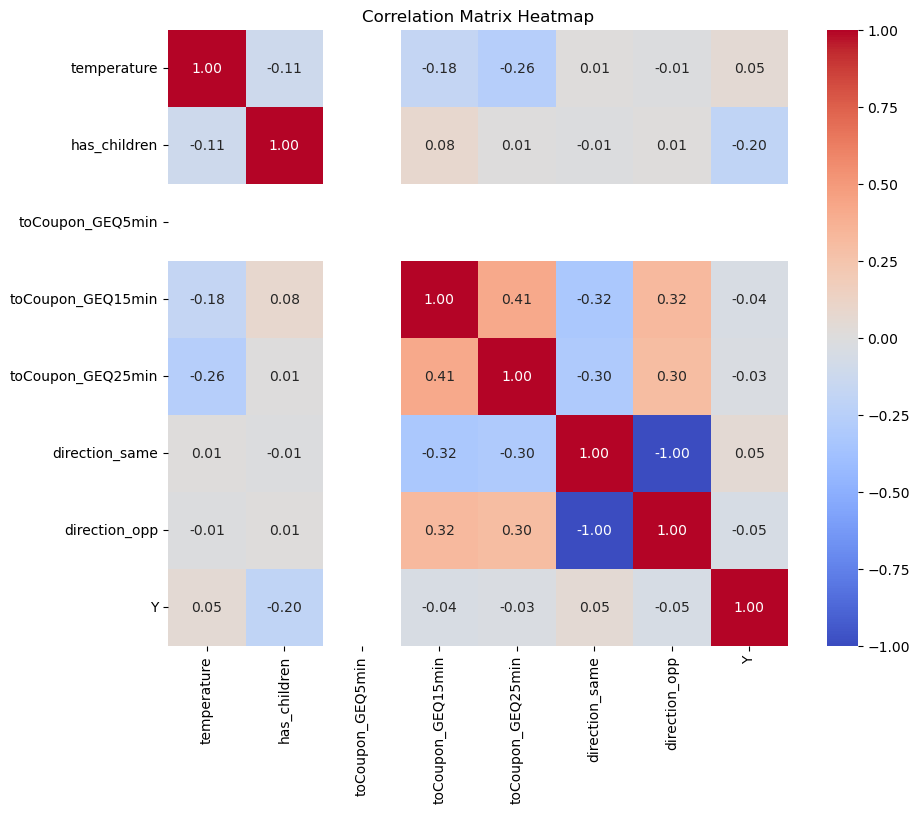

In [94]:
# Calculate the correlation matrix

numeric_columns = bar_coupons_data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
correlation_matrix = numeric_columns.corr()  # Calculate correlation matrix


# Extract the correlation coefficients related to the acceptance of bar coupons
bar_coupons_acceptance_correlation = correlation_matrix['Y']

# Print the correlation coefficients
print(bar_coupons_acceptance_correlation)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.savefig("Coupon Heat Map.png")
plt.show()


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [107]:
# Create a new DataFrame containing only the rows where the coupon type is "restaurant <20"
#Also would like to use the income...so converting the range to the highest value in the range

#data['income'] = data['income'].str.extract(r'\$(\d+)').astype(int)
rest_coupons_data = data[data['coupon'] == 'Restaurant(<20)'].copy()

rest_coupons_data['income']

0        37500
5        37500
7        37500
10       37500
11       37500
         ...  
12666    75000
12668    75000
12671    75000
12677    75000
12678    75000
Name: income, Length: 2786, dtype: int32

                   temperature  has_children    income  toCoupon_GEQ5min  \
temperature           1.000000      0.042453 -0.030682               NaN   
has_children          0.042453      1.000000  0.069605               NaN   
income               -0.030682      0.069605  1.000000               NaN   
toCoupon_GEQ5min           NaN           NaN       NaN               NaN   
toCoupon_GEQ15min    -0.102464      0.014191  0.004784               NaN   
toCoupon_GEQ25min    -0.486512     -0.011502  0.039069               NaN   
direction_same        0.207659     -0.074386 -0.032564               NaN   
direction_opp        -0.207659      0.074386  0.032564               NaN   
Y                     0.181211     -0.019501 -0.031402               NaN   

                   toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
temperature                -0.102464          -0.486512        0.207659   
has_children                0.014191          -0.011502       -0.074386   
income        

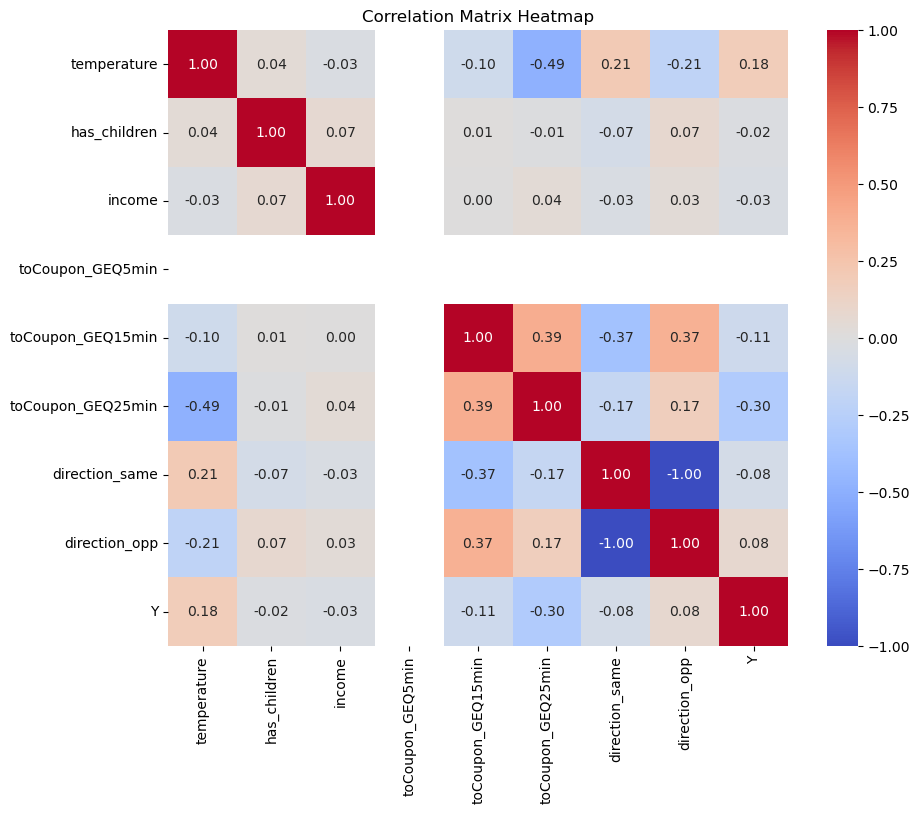

In [105]:
# Calculate the correlation matrix

numeric_columns_rest = rest_coupons_data.select_dtypes(include=['float64', 'int64','int32'])  # Select only numeric columns
correlation_matrix_rest = numeric_columns_rest.corr()  # Calculate correlation matrix

print(correlation_matrix_rest)
# Extract the correlation coefficients related to the acceptance of bar coupons
rest_coupons_acceptance_correlation = correlation_matrix_rest['Y']

# Print the correlation coefficients
print(rest_coupons_acceptance_correlation)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_rest, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.savefig("Coupon Heat Map.png")
plt.show()